In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Radiomic features are extracted by MM Radiomics WIP (Siemens Healthineers Inc.)
## We can't share the sample csv file due to the data privacy.

In [3]:
data = pd.read_csv('RadiomicFeature.csv')
data.head()

C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (28,29,34,35,44,67,68,1321) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,CustomLabel,ObjectName,ObjectDescription,ObjectVolume,BoundingBoxCenterWorld,CenterOfGravityWorld,MaxDiameterXY,MaxDiameterXZ,MaxDiameterYZ,...,texture,malignancy,radiologistIdx,lesionIdx,malignancyStd,malignancyG1,malignancyG2,malignancyG3,malignancyG4,malignant
0,0,benign,OBJ1,1012_0_0,0.100268,"(-88.114874, -94.594963, -170.454987)","(-88.25789966666667, -94.98640166666667, -169....",8.079539,6.117420,7.949216,...,1,2.00,0,0,0.000000,1,0,0,0,0
1,1,benign,OBJ2,1012_1_0,0.090868,"(-88.114874, -94.23363499999999, -169.454987)","(-88.34745294252873, -94.32500529885057, -168....",5.826239,4.935150,7.498211,...,3,2.00,1,1,0.000000,1,0,0,0,0
2,4,malignant,OBJ1,0965_0_0,1.411258,"(-55.94125, 74.31671525, 1790.0)","(-56.473701453942226, 74.15419878337237, 1790....",17.703934,18.846577,16.450157,...,3,4.00,0,2,0.707107,1,1,1,0,1
3,8,benign,OBJ1,0963_0_0,0.040096,"(-43.804642, -50.197233499999996, -147.105011)","(-43.71814642857143, -50.157445537142856, -146...",5.711983,5.193993,4.819473,...,5,2.25,0,3,0.433013,1,1,0,0,0
4,12,malignant,OBJ1,0905_0_0,0.591042,"(-29.518752999999997, 49.040627, -86.234985)","(-29.352718844402276, 48.674314144212524, -85....",13.306043,14.272948,14.604361,...,5,4.00,0,4,0.707107,1,1,1,0,1


In [4]:
radiofeature = data.loc[:, 'general_info_VoxelNum':'wavelet-LLL_ngtdm_Strength']
label = data['CustomLabel']
radiofeature.insert(0, "CustomLabel", label, True)

radiofeature['CustomLabel'] = radiofeature['CustomLabel'].map({'benign': 0, 'malignant': 1})
radiofeature.head()

,CustomLabel,general_info_VoxelNum,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,...,wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,wavelet-LLL_glszm_ZoneEntropy,wavelet-LLL_glszm_ZonePercentage,wavelet-LLL_glszm_ZoneVariance,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0,110,-665.0,32767.0,4.189658e+10,3.499318,33405.00,1.369834,32767,11259.036360,...,3.047325e+06,0.009643,6.685392,0.972727,0.027251,0.004608,0.001740,552404.988500,834.579000,7096.481974
1,0,96,-609.0,-176.5,1.536506e+07,4.122812,174.75,2.430640,-141,-373.468750,...,1.300283e+03,0.017972,5.646339,0.802083,0.263788,0.014006,0.047411,99.047408,0.019652,65.462705
2,1,1435,-469.0,106.6,1.173562e+08,5.056022,358.00,2.047099,308,-187.809756,...,2.719290e+03,0.002197,7.271120,0.761672,0.612066,0.030079,0.007851,20.449641,0.000574,27.585544
3,0,37,-684.6,-43.8,6.711265e+06,4.324186,358.00,2.150586,64,-352.135135,...,1.930219e+03,0.035942,4.937500,0.864865,0.131836,0.017042,0.060322,318.438186,0.332661,109.343724
4,1,586,-442.5,66.0,3.079516e+07,4.245837,293.50,3.145447,322,-103.587031,...,2.162160e+03,0.003695,6.724091,0.706485,1.015800,0.016694,0.016312,21.854738,0.001027,33.306586


C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CustomLabel', ylabel='count'>

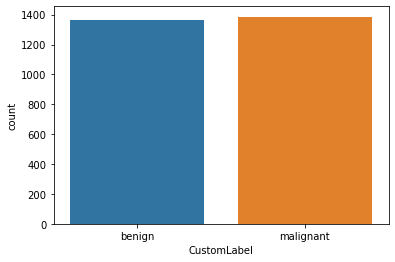

In [5]:
sns.countplot(data['CustomLabel'])

In [6]:
radiofeature.replace('inf', np.nan)
nullvalue = radiofeature.isnull().sum()
print(nullvalue)

CustomLabel                         0
general_info_VoxelNum               0
original_firstorder_10Percentile    0
original_firstorder_90Percentile    0
original_firstorder_Energy          0
                                   ..
wavelet-LLL_ngtdm_Busyness          0
wavelet-LLL_ngtdm_Coarseness        0
wavelet-LLL_ngtdm_Complexity        0
wavelet-LLL_ngtdm_Contrast          0
wavelet-LLL_ngtdm_Strength          0
Length: 1214, dtype: int64


In [7]:
dropRF = radiofeature.dropna(axis=1)
dropRF = radiofeature.dropna(axis=0)
dropRF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 2742
Columns: 1214 entries, CustomLabel to wavelet-LLL_ngtdm_Strength
dtypes: float64(1208), int64(6)
memory usage: 5.7 MB


## Data set

In [8]:
train, test = train_test_split(dropRF, test_size=0.1, random_state=1004, shuffle=True)

x_train = train.drop(['CustomLabel'], axis=1)
y_train = train.CustomLabel

x_test = test.drop(['CustomLabel'], axis=1)
y_test = test.CustomLabel

print(len(train), len(test))

555 62


# Comparision of acc. according to the models

In [9]:
#SVM
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))


#DecisionTree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

#KNeighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

#LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

#RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 79.03
DecisionTreeClassifier: 74.19
KNeighborsClassifier: 83.87
LogisticRegression: 79.03


C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier: 83.87


# Importance of Radiomic Features

In [10]:
features = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

print(features)

original_glcm_Id                      0.014685
original_glcm_Idm                     0.011877
square_glrlm_RunVariance              0.011301
original_glszm_LargeAreaEmphasis      0.008294
original_glrlm_ShortRunEmphasis       0.007702
                                        ...   
logarithm_glcm_JointEntropy           0.000000
exponential_ngtdm_Contrast            0.000000
wavelet-HLL_glcm_JointEntropy         0.000000
wavelet-HHH_glrlm_RunEntropy          0.000000
squareroot_glcm_MaximumProbability    0.000000
Length: 1213, dtype: float64


In [34]:
top_10_features = features.keys()[:20]

print(top_10_features)

Index(['original_glcm_Id', 'original_glcm_Idm', 'square_glrlm_RunVariance',
       'original_glszm_LargeAreaEmphasis', 'original_glrlm_ShortRunEmphasis',
       'original_glszm_ZonePercentage',
       'square_glszm_LargeAreaLowGrayLevelEmphasis',
       'square_gldm_GrayLevelNonUniformity',
       'exponential_glszm_ZonePercentage', 'original_glcm_InverseVariance',
       'original_glrlm_RunLengthNonUniformityNormalized',
       'original_glszm_SizeZoneNonUniformityNormalized',
       'original_gldm_SmallDependenceEmphasis', 'original_glcm_Imc2',
       'original_gldm_DependenceNonUniformityNormalized',
       'exponential_glcm_DifferenceEntropy', 'square_firstorder_Median',
       'original_glrlm_RunVariance', 'square_gldm_LargeDependenceEmphasis',
       'exponential_glrlm_LongRunEmphasis'],
      dtype='object')


In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

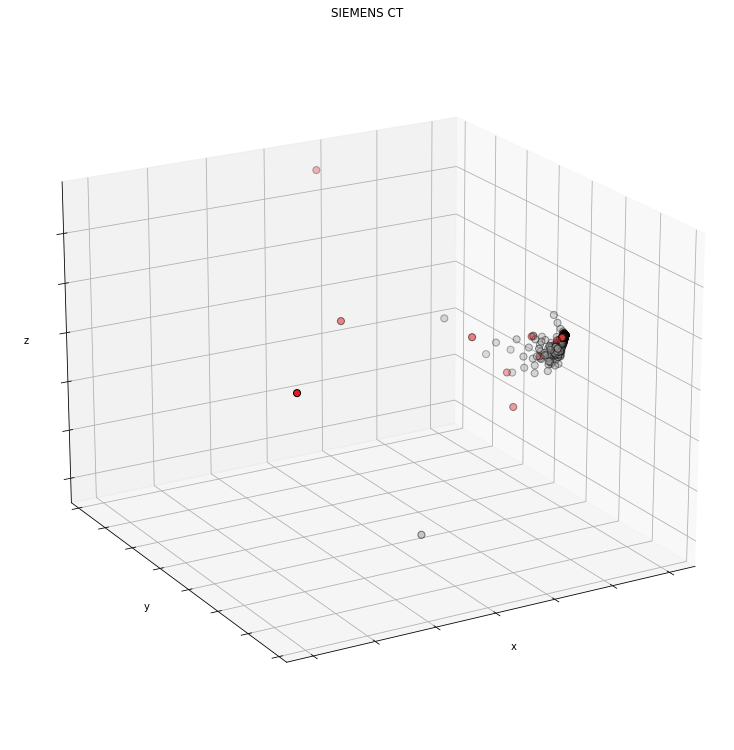

In [36]:
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig, elev=-160, azim=120)
X_reduced = PCA(n_components=3).fit_transform(radiofeature.loc[:, top_10_features])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=radiofeature['CustomLabel'], cmap=plt.cm.Set1, edgecolor='k', s=50)
ax.set_title("SIEMENS CT")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Acc of model with Top 10 features

In [38]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=1000)
    }


for name, model in models.items():
    model.fit(x_train[top_10_features], y_train)
    y_pred = model.predict(x_test[top_10_features])
    print('%s: %.2f' % (name, (metrics.accuracy_score(y_pred, y_test) * 100)))


SVM: 72.58
DecisionTreeClassifier: 70.97
KNeighborsClassifier: 70.97
LogisticRegression: 80.65
RandomForestClassifier: 75.81


# Cross Validation

In [186]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, radiofeature[top_10_features], radiofeature.CustomLabel, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 56.57%
DecisionTreeClassifier: 59.62%
KNeighborsClassifier: 59.73%
LogisticRegression: 64.61%
RandomForestClassifier: 64.97%


# MinMax Normalization

In [187]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(radiofeature[top_10_features])

models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=3, random_state=2019, shuffle = True)

for name, model in models.items():
    scores = cross_val_score(model, scaled_data, radiofeature.CustomLabel, cv=cv)
    model.fit(x_train[top_10_features], y_train)
    y_pred = model.predict(scaled_data)
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))


SVM: 65.04%
DecisionTreeClassifier: 59.48%
KNeighborsClassifier: 60.06%
LogisticRegression: 64.35%
RandomForestClassifier: 64.68%


In [188]:
clf = ['benign', 'malignant']
inp = np.array(y_test)
oup = np.array(y_pred)

for i in range(len(inp)):
    print('input : ' + clf[inp[i]] + '  ----------->  output : ' + clf[oup[i]])


input : malignant  ----------->  output : benign
input : malignant  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : malignant  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : malignant
input : benign  ----------->  output : malignant
input : benign  ----------->  output : malignant
input : benign  ----------->  output : malignant
input : benign  ----------->  output : benign
input : benign  ----------->  output : benign
input : benign  ----------->  output : malignant
input : benign  ----------->  output : benign
input : benign  ----------->  output : malignant
input : benign  ----------->  output : benign
input :

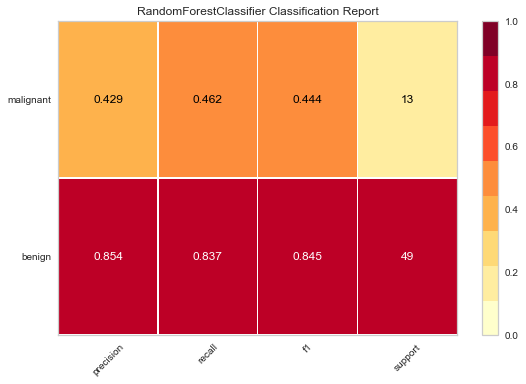

In [189]:
from yellowbrick.classifier import ClassificationReport

vizualizer = ClassificationReport(model, classes=clf, support=True)
vizualizer.fit(x_train.loc[:, top_10_features], y_train)
vizualizer.score(x_test.loc[:, top_10_features], y_test)
vizualizer.show();

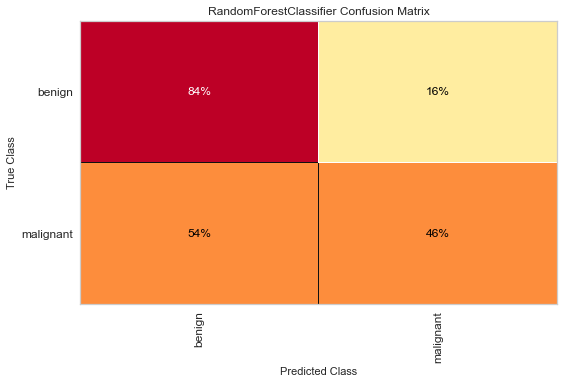

In [190]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model, classes=clf, percent=True) #label_encoder={0: 'Normal', 1: 'Fat', 2: 'Fibrosis'}
cm.fit(x_train.loc[:, top_10_features], y_train)
cm.score(x_test.loc[:, top_10_features], y_test)
cm.show();

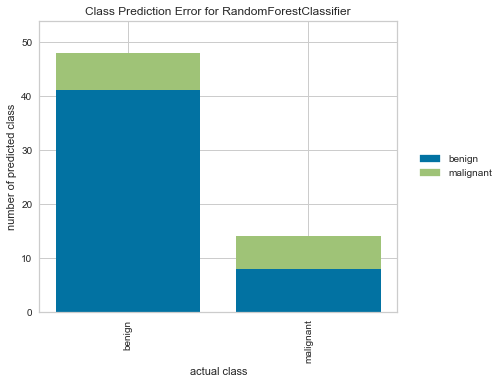

In [191]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(model, classes=clf)
visualizer.fit(x_train.loc[:, top_10_features], y_train)
visualizer.score(x_test.loc[:, top_10_features], y_test)
visualizer.show();

C:\Users\User\anaconda3\envs\ganzer\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CustomLabel', ylabel='count'>

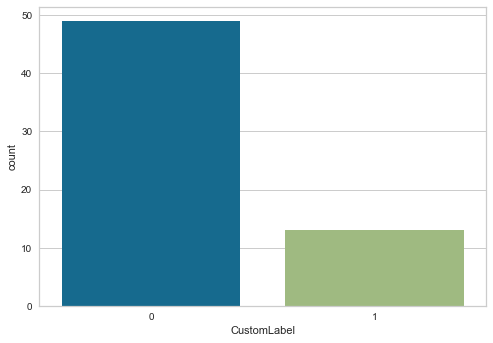

In [193]:
sns.countplot(y_test)

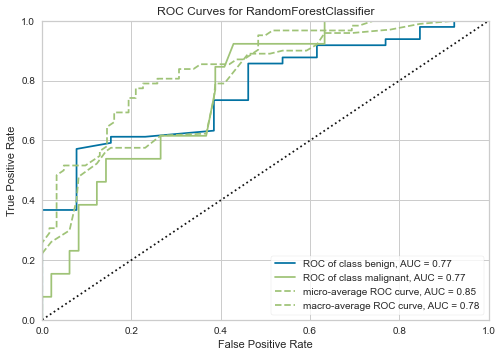

In [164]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=['benign', 'malignant'])
visualizer.fit(x_train.loc[:, top_10_features], y_train)
visualizer.score(x_test.loc[:, top_10_features], y_test)
visualizer.show();

# Deep Learning

In [165]:
from keras import utils, models, layers, optimizers
from keras.models import Model, load_model, Sequential

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Input, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import GlobalAveragePooling2D, ZeroPadding2D, Add
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [166]:
model = Sequential()
model.add(Dense(2048, input_dim=1213, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(optimizer = optimizers.Adam(lr = 1e-5), loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              2486272   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [167]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)])


Train on 555 samples, validate on 62 samples
Epoch 1/100
555/555 [==============================] - 1s 2ms/step - loss: 15732273267.7766 - binary_accuracy: 0.7658 - val_loss: 1072602240.0000 - val_binary_accuracy: 0.7903
Epoch 2/100
555/555 [==============================] - 0s 136us/step - loss: 995869556.0072 - binary_accuracy: 0.7658 - val_loss: 583757632.0000 - val_binary_accuracy: 0.7903
Epoch 3/100
555/555 [==============================] - 0s 165us/step - loss: 535392152.2739 - binary_accuracy: 0.7622 - val_loss: 175904928.0000 - val_binary_accuracy: 0.8065
Epoch 4/100
555/555 [==============================] - 0s 146us/step - loss: 149065583.4234 - binary_accuracy: 0.6937 - val_loss: 26939302.0000 - val_binary_accuracy: 0.6452
Epoch 5/100
555/555 [==============================] - 0s 138us/step - loss: 48880587.1550 - binary_accuracy: 0.6595 - val_loss: 14248230.0000 - val_binary_accuracy: 0.6290
Epoch 6/100
555/555 [==============================] - 0s 137us/step - loss: 18085

555/555 [==============================] - 0s 160us/step - loss: 0.5942 - binary_accuracy: 0.7658 - val_loss: 2350534.5000 - val_binary_accuracy: 0.7903
Epoch 99/100
555/555 [==============================] - 0s 154us/step - loss: 0.5942 - binary_accuracy: 0.7658 - val_loss: 2350531.7500 - val_binary_accuracy: 0.7903
Epoch 100/100
555/555 [==============================] - 0s 149us/step - loss: 0.5942 - binary_accuracy: 0.7658 - val_loss: 2350541.7500 - val_binary_accuracy: 0.7903


Train on 493 samples, validate on 124 samples
Epoch 1/100
493/493 [==============================] - 1s 2ms/step - loss: 2168725843.5375 - binary_accuracy: 0.7627 - val_loss: 1018854284.3871 - val_binary_accuracy: 0.7984
Epoch 2/100
493/493 [==============================] - 0s 140us/step - loss: 503036744.5680 - binary_accuracy: 0.7586 - val_loss: 551996424.2581 - val_binary_accuracy: 0.7903
Epoch 3/100
493/493 [==============================] - 0s 111us/step - loss: 230916768.0568 - binary_accuracy: 0.7586 - val_loss: 314278581.6774 - val_binary_accuracy: 0.7903
Epoch 4/100
493/493 [==============================] - 0s 137us/step - loss: 66466596.1542 - binary_accuracy: 0.6775 - val_loss: 231002512.5161 - val_binary_accuracy: 0.7419
Epoch 5/100
493/493 [==============================] - 0s 127us/step - loss: 22768368.8230 - binary_accuracy: 0.5903 - val_loss: 234868368.0000 - val_binary_accuracy: 0.7339
Epoch 6/100
493/493 [==============================] - 0s 140us/step - loss: 10733630.8263 - binary_accuracy: 0.5700 - val_loss: 242340810.3226 - val_binary_accuracy: 0.7177
Epoch 7/100
493/493 [==============================] - 0s 140us/step - loss: 2856025.0979 - binary_accuracy: 0.5396 - val_loss: 248751884.9154 - val_binary_accuracy: 0.6774
Epoch 8/100
493/493 [==============================] - 0s 127us/step - loss: 822986.7544 - binary_accuracy: 0.5071 - val_loss: 256372352.8942 - val_binary_accuracy: 0.6129
Epoch 9/100
493/493 [==============================] - 0s 140us/step - loss: 464807.3795 - binary_accuracy: 0.4868 - val_loss: 260904621.2199 - val_binary_accuracy: 0.5645
Epoch 10/100
493/493 [==============================] - 0s 127us/step - loss: 144989.8818 - binary_accuracy: 0.4706 - val_loss: 263394960.8919 - val_binary_accuracy: 0.5565
Epoch 11/100
493/493 [==============================] - 0s 120us/step - loss: 113746.4483 - binary_accuracy: 0.4645 - val_loss: 264989990.0542 - val_binary_accuracy: 0.5484
Epoch 12/100
493/493 [==============================] - 0s 114us/step - loss: 94738.6948 - binary_accuracy: 0.4544 - val_loss: 266239233.1563 - val_binary_accuracy: 0.7661
Epoch 13/100
493/493 [==============================] - 0s 127us/step - loss: 66536.4031 - binary_accuracy: 0.7221 - val_loss: 267311246.3531 - val_binary_accuracy: 0.7661
Epoch 14/100
493/493 [==============================] - 0s 143us/step - loss: 48140.4256 - binary_accuracy: 0.7201 - val_loss: 268649612.5963 - val_binary_accuracy: 0.7581
Epoch 15/100
493/493 [==============================] - 0s 137us/step - loss: 38417.4868 - binary_accuracy: 0.7201 - val_loss: 269793593.1066 - val_binary_accuracy: 0.7581
Epoch 16/100
493/493 [==============================] - 0s 127us/step - loss: 30640.7202 - binary_accuracy: 0.7201 - val_loss: 270670537.5486 - val_binary_accuracy: 0.7581
Epoch 17/100
493/493 [==============================] - 0s 140us/step - loss: 17791.8855 - binary_accuracy: 0.7221 - val_loss: 271429834.9811 - val_binary_accuracy: 0.7581
Epoch 18/100
493/493 [==============================] - 0s 108us/step - loss: 16232.1170 - binary_accuracy: 0.7181 - val_loss: 272076223.5978 - val_binary_accuracy: 0.7661
Epoch 19/100
493/493 [==============================] - 0s 95us/step - loss: 3866.6866 - binary_accuracy: 0.7241 - val_loss: 272655722.5999 - val_binary_accuracy: 0.7742
Epoch 20/100
493/493 [==============================] - 0s 102us/step - loss: 234.5362 - binary_accuracy: 0.7302 - val_loss: 273024455.6061 - val_binary_accuracy: 0.7742
Epoch 21/100
493/493 [==============================] - 0s 140us/step - loss: 204.2950 - binary_accuracy: 0.7343 - val_loss: 273376279.8533 - val_binary_accuracy: 0.7742
Epoch 22/100
493/493 [==============================] - 0s 127us/step - loss: 182.0681 - binary_accuracy: 0.7363 - val_loss: 273668738.8902 - val_binary_accuracy: 0.7742
Epoch 23/100
493/493 [==============================] - 0s 140us/step - loss: 166.1894 - binary_accuracy: 0.7404 - val_loss: 273827912.8405 - val_binary_accuracy: 0.7742
Epoch 24/100
493/493 [==============================] - 0s 140us/step - loss: 155.5674 - binary_accuracy: 0.7424 - val_loss: 273896939.7935 - val_binary_accuracy: 0.7742
Epoch 25/100
493/493 [==============================] - 0s 127us/step - loss: 156.2020 - binary_accuracy: 0.7424 - val_loss: 273926358.8939 - val_binary_accuracy: 0.7742
Epoch 26/100
493/493 [==============================] - 0s 140us/step - loss: 131.0804 - binary_accuracy: 0.7444 - val_loss: 273937011.3054 - val_binary_accuracy: 0.7742
Epoch 27/100
493/493 [==============================] - 0s 127us/step - loss: 126.0992 - binary_accuracy: 0.7444 - val_loss: 273943235.6445 - val_binary_accuracy: 0.7742
Epoch 28/100
493/493 [==============================] - 0s 108us/step - loss: 115.0219 - binary_accuracy: 0.7444 - val_loss: 273946146.5850 - val_binary_accuracy: 0.7742
Epoch 29/100
493/493 [==============================] - 0s 108us/step - loss: 104.6483 - binary_accuracy: 0.7444 - val_loss: 273948871.7916 - val_binary_accuracy: 0.7742
Epoch 30/100
493/493 [==============================] - 0s 127us/step - loss: 100.5912 - binary_accuracy: 0.7444 - val_loss: 273951968.5643 - val_binary_accuracy: 0.7742
Epoch 31/100
493/493 [==============================] - 0s 140us/step - loss: 79.6827 - binary_accuracy: 0.7465 - val_loss: 273954074.3593 - val_binary_accuracy: 0.7742
Epoch 32/100
493/493 [==============================] - 0s 140us/step - loss: 78.7807 - binary_accuracy: 0.7465 - val_loss: 273955127.2056 - val_binary_accuracy: 0.7742
Epoch 33/100
493/493 [==============================] - 0s 127us/step - loss: 78.2522 - binary_accuracy: 0.7465 - val_loss: 273956025.2021 - val_binary_accuracy: 0.7742
Epoch 34/100
493/493 [==============================] - 0s 140us/step - loss: 77.8893 - binary_accuracy: 0.7465 - val_loss: 273956830.2722 - val_binary_accuracy: 0.7742
Epoch 35/100
493/493 [==============================] - 0s 108us/step - loss: 77.2712 - binary_accuracy: 0.7465 - val_loss: 273957542.4498 - val_binary_accuracy: 0.7742
Epoch 36/100
493/493 [==============================] - 0s 127us/step - loss: 76.8062 - binary_accuracy: 0.7465 - val_loss: 273958378.4921 - val_binary_accuracy: 0.7742
Epoch 37/100
493/493 [==============================] - 0s 140us/step - loss: 76.3600 - binary_accuracy: 0.7465 - val_loss: 273959028.7333 - val_binary_accuracy: 0.7742
Epoch 38/100
493/493 [==============================] - 0s 144us/step - loss: 75.7221 - binary_accuracy: 0.7465 - val_loss: 273959679.0033 - val_binary_accuracy: 0.7742
Epoch 39/100
493/493 [==============================] - 0s 131us/step - loss: 75.3208 - binary_accuracy: 0.7465 - val_loss: 273960484.1242 - val_binary_accuracy: 0.7742
Epoch 40/100
493/493 [==============================] - 0s 129us/step - loss: 74.7656 - binary_accuracy: 0.7465 - val_loss: 273961010.4979 - val_binary_accuracy: 0.7742
Epoch 41/100
493/493 [==============================] - 0s 126us/step - loss: 74.1669 - binary_accuracy: 0.7465 - val_loss: 273961351.0886 - val_binary_accuracy: 0.7742
Epoch 42/100
493/493 [==============================] - 0s 128us/step - loss: 73.6070 - binary_accuracy: 0.7485 - val_loss: 273961691.6845 - val_binary_accuracy: 0.7742
Epoch 43/100
493/493 [==============================] - 0s 126us/step - loss: 73.1716 - binary_accuracy: 0.7485 - val_loss: 273961412.9207 - val_binary_accuracy: 0.7742
Epoch 44/100
493/493 [==============================] - 0s 130us/step - loss: 72.6828 - binary_accuracy: 0.7465 - val_loss: 273935802.5349 - val_binary_accuracy: 0.7742
Epoch 45/100
493/493 [==============================] - 0s 127us/step - loss: 72.1345 - binary_accuracy: 0.7465 - val_loss: 273922052.7848 - val_binary_accuracy: 0.7742
Epoch 46/100
493/493 [==============================] - 0s 126us/step - loss: 71.5768 - binary_accuracy: 0.7465 - val_loss: 273916416.5968 - val_binary_accuracy: 0.7742
Epoch 47/100
493/493 [==============================] - 0s 131us/step - loss: 70.9978 - binary_accuracy: 0.7465 - val_loss: 273913846.1946 - val_binary_accuracy: 0.7742
Epoch 48/100
493/493 [==============================] - 0s 126us/step - loss: 70.4981 - binary_accuracy: 0.7465 - val_loss: 273912948.0389 - val_binary_accuracy: 0.7742
Epoch 49/100
493/493 [==============================] - 0s 127us/step - loss: 69.9171 - binary_accuracy: 0.7465 - val_loss: 273912545.3826 - val_binary_accuracy: 0.7742
Epoch 50/100
493/493 [==============================] - 0s 128us/step - loss: 69.3516 - binary_accuracy: 0.7485 - val_loss: 273912390.4442 - val_binary_accuracy: 0.7742
Epoch 51/100
493/493 [==============================] - 0s 128us/step - loss: 68.7495 - binary_accuracy: 0.7485 - val_loss: 273912545.1619 - val_binary_accuracy: 0.7742
Epoch 52/100
493/493 [==============================] - 0s 128us/step - loss: 68.0072 - binary_accuracy: 0.7485 - val_loss: 273912514.1015 - val_binary_accuracy: 0.7742
Epoch 53/100
493/493 [==============================] - 0s 112us/step - loss: 67.5458 - binary_accuracy: 0.7485 - val_loss: 273912421.0645 - val_binary_accuracy: 0.7742
Epoch 54/100
493/493 [==============================] - 0s 128us/step - loss: 66.8268 - binary_accuracy: 0.7485 - val_loss: 273912513.8873 - val_binary_accuracy: 0.7742
Epoch 55/100
493/493 [==============================] - 0s 140us/step - loss: 66.1764 - binary_accuracy: 0.7485 - val_loss: 273912730.5915 - val_binary_accuracy: 0.7742
Epoch 56/100
493/493 [==============================] - 0s 127us/step - loss: 65.3323 - binary_accuracy: 0.7485 - val_loss: 273907311.1857 - val_binary_accuracy: 0.7742
Epoch 57/100
493/493 [==============================] - 0s 117us/step - loss: 64.7647 - binary_accuracy: 0.7465 - val_loss: 273883466.0212 - val_binary_accuracy: 0.7742
Epoch 58/100
493/493 [==============================] - 0s 131us/step - loss: 63.9825 - binary_accuracy: 0.7465 - val_loss: 273891889.2528 - val_binary_accuracy: 0.7742
Epoch 59/100
493/493 [==============================] - 0s 127us/step - loss: 63.2048 - binary_accuracy: 0.7465 - val_loss: 273895605.3136 - val_binary_accuracy: 0.7742
Epoch 60/100
493/493 [==============================] - 0s 108us/step - loss: 62.4666 - binary_accuracy: 0.7465 - val_loss: 273897432.3404 - val_binary_accuracy: 0.7742
Epoch 61/100
493/493 [==============================] - 0s 127us/step - loss: 61.6668 - binary_accuracy: 0.7465 - val_loss: 273898578.0842 - val_binary_accuracy: 0.7742
Epoch 62/100
493/493 [==============================] - 0s 108us/step - loss: 60.8692 - binary_accuracy: 0.7465 - val_loss: 273899104.4614 - val_binary_accuracy: 0.7742
Epoch 63/100
493/493 [==============================] - 0s 140us/step - loss: 60.1061 - binary_accuracy: 0.7465 - val_loss: 273899661.7654 - val_binary_accuracy: 0.7742
Epoch 64/100
493/493 [==============================] - 0s 127us/step - loss: 59.2497 - binary_accuracy: 0.7465 - val_loss: 273899878.4448 - val_binary_accuracy: 0.7823
Epoch 65/100
493/493 [==============================] - 0s 140us/step - loss: 58.3863 - binary_accuracy: 0.7465 - val_loss: 273899909.2813 - val_binary_accuracy: 0.7823
Epoch 66/100
493/493 [==============================] - 0s 108us/step - loss: 57.5179 - binary_accuracy: 0.7465 - val_loss: 273900373.6744 - val_binary_accuracy: 0.7823
Epoch 67/100
493/493 [==============================] - 0s 127us/step - loss: 56.5924 - binary_accuracy: 0.7465 - val_loss: 273900435.4922 - val_binary_accuracy: 0.7823
Epoch 68/100
493/493 [==============================] - 0s 108us/step - loss: 56.5140 - binary_accuracy: 0.7465 - val_loss: 273904120.3717 - val_binary_accuracy: 0.7823
Epoch 69/100
493/493 [==============================] - 0s 140us/step - loss: 47.7985 - binary_accuracy: 0.7485 - val_loss: 273907247.7827 - val_binary_accuracy: 0.7823
Epoch 70/100
493/493 [==============================] - 0s 127us/step - loss: 47.0066 - binary_accuracy: 0.7465 - val_loss: 273898669.6210 - val_binary_accuracy: 0.7823
Epoch 71/100
493/493 [==============================] - 0s 140us/step - loss: 46.4437 - binary_accuracy: 0.7485 - val_loss: 273895263.0225 - val_binary_accuracy: 0.7823
Epoch 72/100
493/493 [==============================] - 0s 140us/step - loss: 45.7870 - binary_accuracy: 0.7485 - val_loss: 273893683.4946 - val_binary_accuracy: 0.7823
Epoch 73/100
493/493 [==============================] - 0s 127us/step - loss: 44.8726 - binary_accuracy: 0.7485 - val_loss: 273893342.6801 - val_binary_accuracy: 0.7823
Epoch 74/100
493/493 [==============================] - 0s 108us/step - loss: 44.1586 - binary_accuracy: 0.7485 - val_loss: 273924557.9932 - val_binary_accuracy: 0.7823
Epoch 75/100
493/493 [==============================] - 0s 127us/step - loss: 43.3561 - binary_accuracy: 0.7485 - val_loss: 273950353.9454 - val_binary_accuracy: 0.7823
Epoch 76/100
493/493 [==============================] - 0s 108us/step - loss: 42.7162 - binary_accuracy: 0.7485 - val_loss: 273961842.7871 - val_binary_accuracy: 0.7823
Epoch 77/100
493/493 [==============================] - 0s 108us/step - loss: 41.6648 - binary_accuracy: 0.7485 - val_loss: 273966766.5035 - val_binary_accuracy: 0.7823
Epoch 78/100
493/493 [==============================] - 0s 127us/step - loss: 41.1224 - binary_accuracy: 0.7505 - val_loss: 273969119.8533 - val_binary_accuracy: 0.7823
Epoch 79/100
493/493 [==============================] - 0s 140us/step - loss: 40.2868 - binary_accuracy: 0.7505 - val_loss: 273970791.9423 - val_binary_accuracy: 0.7823
Epoch 80/100
493/493 [==============================] - 0s 140us/step - loss: 84.4206 - binary_accuracy: 0.7485 - val_loss: 273921582.8382 - val_binary_accuracy: 0.7742
Epoch 81/100
493/493 [==============================] - 0s 127us/step - loss: 80.1669 - binary_accuracy: 0.7424 - val_loss: 273899346.5730 - val_binary_accuracy: 0.7742
Epoch 82/100
493/493 [==============================] - 0s 140us/step - loss: 76.0526 - binary_accuracy: 0.7424 - val_loss: 273892811.7838 - val_binary_accuracy: 0.7742
Epoch 83/100
493/493 [==============================] - 0s 108us/step - loss: 57.7292 - binary_accuracy: 0.7444 - val_loss: 273891975.4777 - val_binary_accuracy: 0.7742
Epoch 84/100
493/493 [==============================] - 0s 127us/step - loss: 54.2452 - binary_accuracy: 0.7465 - val_loss: 273893338.0189 - val_binary_accuracy: 0.7742
Epoch 85/100
493/493 [==============================] - 0s 108us/step - loss: 53.2282 - binary_accuracy: 0.7485 - val_loss: 273894452.7640 - val_binary_accuracy: 0.7742
Epoch 86/100
493/493 [==============================] - 0s 140us/step - loss: 52.4136 - binary_accuracy: 0.7485 - val_loss: 273895010.1227 - val_binary_accuracy: 0.7742
Epoch 87/100
493/493 [==============================] - 0s 127us/step - loss: 50.6464 - binary_accuracy: 0.7485 - val_loss: 273895319.8621 - val_binary_accuracy: 0.7742
Epoch 88/100
493/493 [==============================] - 0s 140us/step - loss: 48.2376 - binary_accuracy: 0.7485 - val_loss: 273895876.7236 - val_binary_accuracy: 0.7742
Epoch 89/100
493/493 [==============================] - 0s 140us/step - loss: 44.9811 - binary_accuracy: 0.7505 - val_loss: 273896526.5769 - val_binary_accuracy: 0.7742
Epoch 90/100
493/493 [==============================] - 0s 127us/step - loss: 42.8394 - binary_accuracy: 0.7505 - val_loss: 273896680.4038 - val_binary_accuracy: 0.7742
Epoch 91/100
493/493 [==============================] - 0s 140us/step - loss: 40.8381 - binary_accuracy: 0.7444 - val_loss: 273896865.3216 - val_binary_accuracy: 0.7742
Epoch 92/100
493/493 [==============================] - 0s 127us/step - loss: 38.0705 - binary_accuracy: 0.7505 - val_loss: 273897638.9177 - val_binary_accuracy: 0.7742
Epoch 93/100
493/493 [==============================] - 0s 127us/step - loss: 36.9944 - binary_accuracy: 0.7505 - val_loss: 273898195.6565 - val_binary_accuracy: 0.7742
Epoch 94/100
493/493 [==============================] - 0s 108us/step - loss: 35.4747 - binary_accuracy: 0.7525 - val_loss: 273898070.9015 - val_binary_accuracy: 0.7742
Epoch 95/100
493/493 [==============================] - 0s 127us/step - loss: 33.7749 - binary_accuracy: 0.7525 - val_loss: 273897884.1822 - val_binary_accuracy: 0.7742
Epoch 96/100
493/493 [==============================] - 0s 108us/step - loss: 32.4153 - binary_accuracy: 0.7525 - val_loss: 273897728.3674 - val_binary_accuracy: 0.7742
Epoch 97/100
493/493 [==============================] - 0s 139us/step - loss: 31.0661 - binary_accuracy: 0.7546 - val_loss: 273897015.1226 - val_binary_accuracy: 0.7742
Epoch 98/100
493/493 [==============================] - 0s 127us/step - loss: 29.4358 - binary_accuracy: 0.7566 - val_loss: 273896580.6961 - val_binary_accuracy: 0.7742
Epoch 99/100
493/493 [==============================] - 0s 140us/step - loss: 29.8087 - binary_accuracy: 0.7566 - val_loss: 273897107.1425 - val_binary_accuracy: 0.7742
Epoch 100/100
493/493 [==============================] - 0s 140us/step - loss: 28.2546 - binary_accuracy: 0.7566 - val_loss: 273897199.8182 - val_binary_accuracy: 0.7742

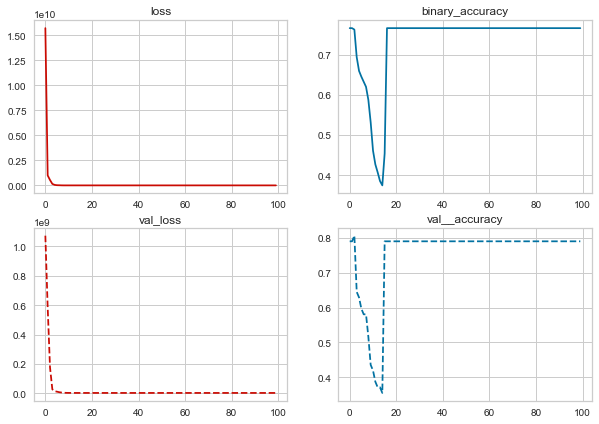

In [168]:
trained_weight = "C:\\Users\\User\\Desktop\\weight.hdf5"
model.save_weights(trained_weight)
        
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('binary_accuracy')
ax[0, 1].plot(history.history['binary_accuracy'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val__accuracy')
ax[1, 1].plot(history.history['val_binary_accuracy'], 'b--')

In [1]:
!pip install IPython 
from IPython.display import Image  

![title](C:/Users/User/Desktop/Figure_1.png) 